# Принятие решений в бизнесе

# Введение:

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.


# Цель исследования:

Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 
Для этого необходимо:
1. Построить графики кумулятивной выручки, среднего чека и среднего количества заказов на посетителя по группам, группы В к группе А.

2. Построить точечный график количества заказов по пользователям и стоимостей заказов с учетом аномальных заказов и без.

3. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным и по «очищенным» данным.

4. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данными по «очищенным» данным.


# План исследования:

Шаг 1. Загрузить данные и подготовить их к анализу

Шаг 2. Приоритизировать гипотезы.

Шаг 3. Провести анализ A/B-теста


### Загрузим данные и подготовим их к анализу

In [1]:
from IPython.display import display
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

In [2]:
pd.set_option('display.max_colwidth', None)

#### Сохраним данные в датафреймы

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

#### Выведим первые строки набора данных, основную информацию о датафрейме с помощью метода `info()` и найдем явные дубликаты:

In [4]:
def data_frame(x):
    display(x.head(10)) 
    print('*'*50)
    x.info()
    print('*'*50)
    print('Количество дубликатов:', x.duplicated().sum())

In [5]:
 data_frame(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
**************************************************
Количество дубликатов: 0


In [6]:
hypothesis = hypothesis.rename(columns={'Hypothesis': 'hypothesis', 'Reach': 'reach', 'Impact': 'impact',
                                        'Confidence': 'confidence', 'Efforts': 'efforts'})

### Приоритизируем гипотезы

#### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [7]:
hypothesis['ICE'] = round(((hypothesis['impact'] *hypothesis['confidence']) / hypothesis['efforts']),1)
display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


**Вывод:** Приоритизация гипотез после применения фреймворка ICE:

Гипотеза "Запустить акцию, дающую скидку на товар в день рождения" на первом месте, после идут гипотезы:

2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

5. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.

6. Запустить собственную службу доставки, что сократит срок доставки заказов.

7. Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов.

8. Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар.

9. Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей.



#### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [8]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'] 
display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод:** Приоритизация гипотез после применения фреймворка RICE:

Гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" на первом месте, после идут гипотезы:

2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.

3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

5. Запустить акцию, дающую скидку на товар в день рождения.

6. Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар.

7. Запустить собственную службу доставки, что сократит срок доставки заказов.

8. Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов	.

9. Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей.

#### Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

**Вывод:** 

Приоритизация ICE: 

Гипотеза "Запустить акцию, дающую скидку на товар в день рождения" на первом месте, после идут гипотезы:

2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

5. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.

6. Запустить собственную службу доставки, что сократит срок доставки заказов.

7. Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов.

8. Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар.

9. Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей.

Приоритизация RICE:

Гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" на первом месте, после идут гипотезы:

2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.

3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

5. Запустить акцию, дающую скидку на товар в день рождения.

6. Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар.

7. Запустить собственную службу доставки, что сократит срок доставки заказов.

8. Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов	.

9. Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей.


Приоритизация гипотез при применения RICE изменилась, из-за того, что показатель reach (охват пользователей) у гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" составляет 10, у гипотез "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"  и "Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар" - 8, у гипотез "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию" показатель RICE равен, хотя reach у этих гипотез разный, так как показатель impact (сила влияния изменения метрики на этих пользователей) у "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" гипотезы составляет 10, а у гипотезы "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсии" - 3. 
    
Из-за соотношения показателей ICE и RICE будет меняться приоритизация гипотез. Приоритизация гипотез будет зависить нужно ли нам оценить кроме силы гипотез, и то, как много пользователей гипотеза затронет. 


### Анализ A/B-теста

 #### Сохраним данные в датафреймы

In [9]:
orders = pd.read_csv('/datasets/orders.csv')

In [10]:
visitors = pd.read_csv('/datasets/visitors.csv')

#### Выведим первые строки набора данных, основную информацию о датафреймах с помощью метода `info()` и найдем явные дубликаты:

In [11]:
data_frame(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
**************************************************
Количество дубликатов: 0


In [12]:
data_frame(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
**************************************************
Количество дубликатов: 0


#### Поменяем формат столбца date у датафреймов orders и visitors:

In [13]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [14]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [15]:
# Количество групп в АВ-тесте:
visitors['group'].unique()

array(['A', 'B'], dtype=object)

In [16]:
start_date = min(visitors['date'])
end_date = max(visitors['date'])
print('Дата начала теста:', start_date,'Окончания теста:', end_date )

Дата начала теста: 2019-08-01 00:00:00 Окончания теста: 2019-08-31 00:00:00


In [17]:
# Количество пользователей в группе A 
count_A = len(orders.query('group == "A"'))
count_A

557

In [18]:
# Количество пользователей в группе B
count_B = len(orders.query('group == "B"'))
count_B

640

In [19]:
group_a = orders[orders['group'] == 'A']['visitorId'].unique()
group_b = orders[orders['group'] == 'B']['visitorId'].unique()

In [20]:
# Найдем пересечение двух групп
crossing = set(group_a).intersection(set(group_b))

In [21]:
# Вычислим общее количество уникальных пользователей
total_unique_visitor = orders['visitorId'].nunique()
# Вероятность попадания пользователя в обе группы
probability = len(crossing) / total_unique_visitor
print(f"Вероятность попадания пользователя в обе группы: {probability:.2%}")

Вероятность попадания пользователя в обе группы: 5.63%


#### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

In [22]:
# Создадим датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders.
# Избавимся от дубликатов методом drop_duplicates().
datesGroups = orders[['date','group']].drop_duplicates()

In [23]:
# Объявим переменную ordersAggregated:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                     orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}),
                                                                axis=1).sort_values(by=['date','group'])

In [24]:
# Объявим переменную visitorsAggregated:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                                         visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [25]:
# Определим переменную cumulativeData:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [26]:
# Присвоим столбцам cumulativeData названия:
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


In [27]:
# Объявим переменные cumulativeRevenueA и cumulativeRevenueB:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

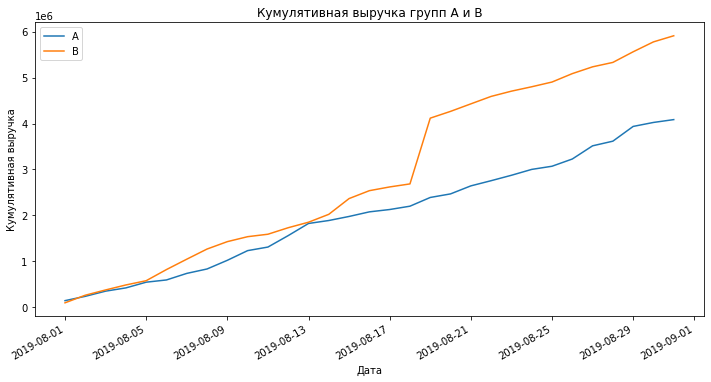

In [28]:
plt.figure(figsize=(12, 6))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
# Добавляем подписи к осям
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
# Добавляем заголовок
plt.title('Кумулятивная выручка групп A и B')
plt.gcf().autofmt_xdate()
# Отображаем график
plt.show()

**Вывод:**
1. Выручка почти равномерно увеличивается в течение всего теста.
2. Группа B имеет более высокую общую выручку к концу наблюдаемого периода по сравнению с группой A.
3. На середине графика видно, резкий скачок у группы B, можно предположить, что произошло важное событие.
4. Также резкие скачки у группы B могут прогнозировать аномалии.

#### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

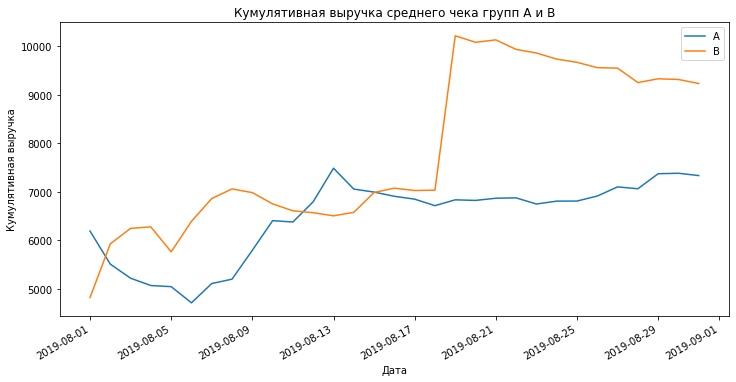

In [29]:
plt.figure(figsize=(12, 6))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
# Добавляем подписи к осям
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
# Добавляем заголовок
plt.title('Кумулятивная выручка среднего чека групп A и B')
plt.gcf().autofmt_xdate()
# Отображаем график
plt.show()

**Вывод:**
1. По графику видно резкий скачок у группы В в середине наблюдаемого периода.
2. По графику видно колебания в выручках в группах А и В. У группы А рост выручки более стабильный.

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

In [30]:
# Объединим таблицы
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

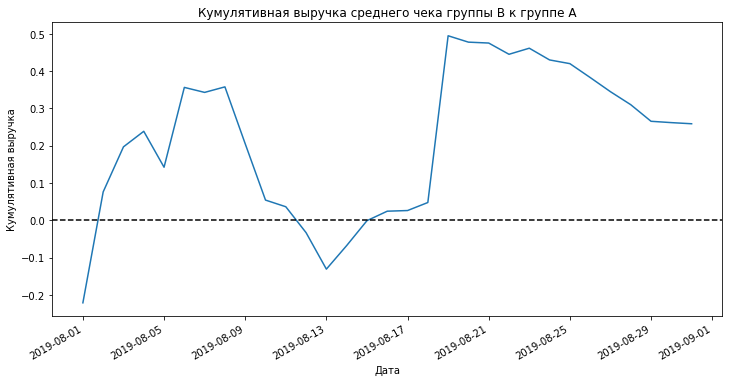

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
# Добавляем подписи к осям
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
# Добавляем заголовок
plt.title('Кумулятивная выручка среднего чека группы В к группе А')
plt.gcf().autofmt_xdate()
# Отображаем график
plt.show()

**Вывод:**
1. По графику видно, что группа В в основном выше пунктирной линии (нулевое изменение), это значит, что средний чек группы В в основном выше группы А.
2. Также видно по графику резкий скачок, предполагается какое-то событие или покупку высокую. Далее после скачка изменения снижаются.

#### Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.

In [32]:
# Добавим в cumulativeData столбец 'conversion' c отношением числа заказов к количеству пользователей 
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

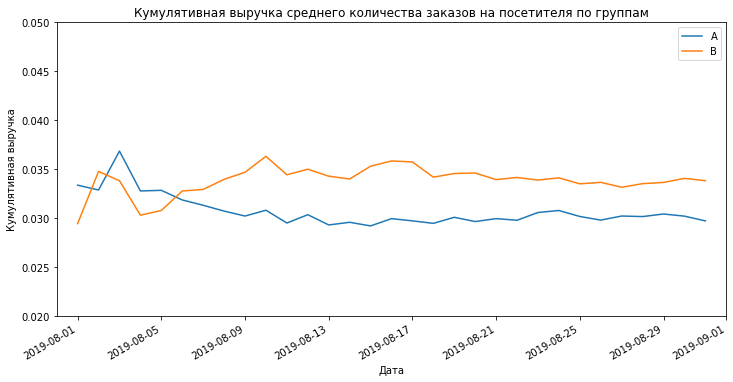

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
# Добавляем подписи к осям
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
# Добавляем заголовок
plt.title('Кумулятивная выручка среднего количества заказов на посетителя по группам')
plt.gcf().autofmt_xdate()
# задаем масштаб осей
plt.axis([dt.datetime(2019, 7, 31), dt.datetime(2019, 9, 1), 0.02, 0.05])
# Отображаем график
plt.show()

**Вывод:**
1. По графику видно, что выручка среднего количества заказов на посетителя группы В выше, чем у группы А.
2. В начале результаты колеблются и группа А выше по выручке, но после группы стабилизируются. Также заметим, что графики имеют небольшую симметричность.

#### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.

In [34]:
# Объединим таблицы
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],
                                                 left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

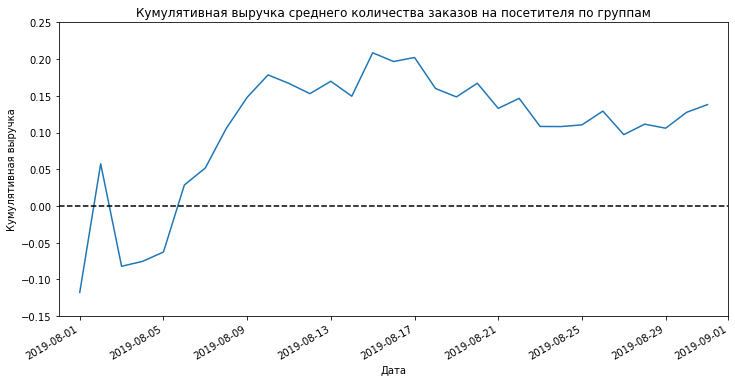

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/
         mergedCumulativeConversions['conversionA']-1,)
# Добавляем подписи к осям
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
# Добавляем заголовок
plt.title('Кумулятивная выручка среднего количества заказов на посетителя по группам')
plt.gcf().autofmt_xdate()
plt.axhline(y=0, color='black', linestyle='--')
plt.axis([dt.datetime(2019, 7, 31), dt.datetime(2019, 9, 1), -0.15, 0.25])
plt.show()

**Вывод:** 
1. В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Группа B в течение теста имела колебания, но выигрывала группу В.
2.В целом отношение среднего количества заказов на посетителя ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Возможно, стоит проанализировать аномалии, возможно, они изменят картину.

#### Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

In [36]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))


          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


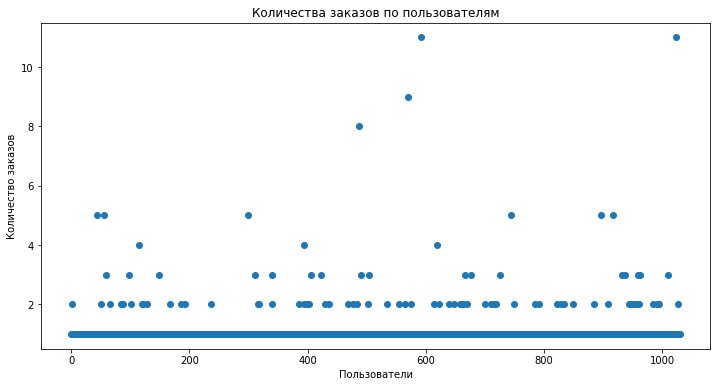

In [37]:
plt.figure(figsize=(12, 6))
plt.scatter(x_values, ordersByUsers['orders'])
# Добавляем подписи к осям
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
# Добавляем заголовок
plt.title('Количества заказов по пользователям')
plt.show()

**Вывод:** 
1. По графику видно, что в основном заказов пользователи имеют по одному, также большинство по двум заказам, чуть меньше по три заказа.
2. Аномалии наблюдаются от 4 до 11 заказов на одного пользователя.

#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [38]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


**Вывод:** 
Не более 5% пользователей совершали больше двух заказов. И не более 1% пользователей — больше 4 заказов.
Примим за аномальных пользователей тех, кто совершил 4 заказа и более. Граница нормальных заказов до 3 включительно.

#### Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

In [39]:
print(orders.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0, len(orders['revenue'])))

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
858       192721366  1316129916 2019-08-27    93940     A
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
682      1216533772  4266935830 2019-08-29    78990     B
662      1811671147  4266935830 2019-08-29    78990     A
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A


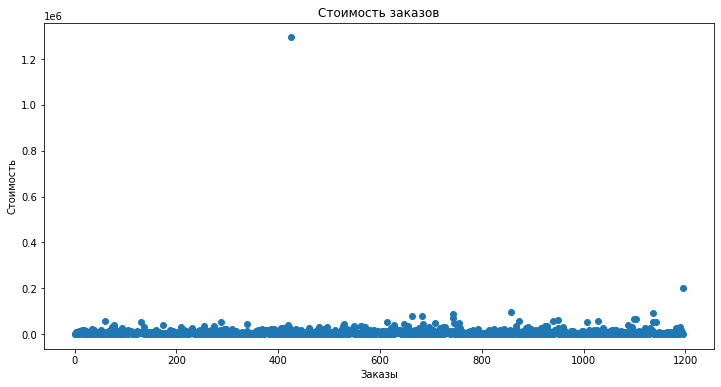

In [40]:
plt.figure(figsize=(12, 6))
plt.scatter(x_values, orders['revenue'])
# Добавляем подписи к осям
plt.xlabel('Заказы')
plt.ylabel('Стоимость')
# Добавляем заголовок
plt.title('Стоимость заказов')
plt.show()

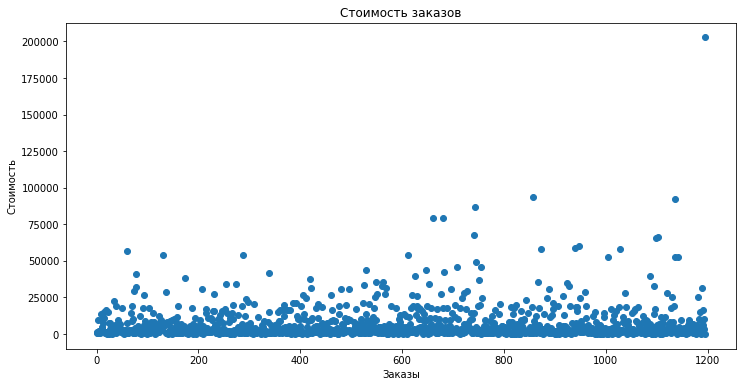

In [41]:
filtered_orders = orders[orders['revenue'] < 400000]
filtered_x_values = pd.Series(range(0, len(filtered_orders)))
plt.figure(figsize=(12, 6))
plt.scatter(filtered_x_values, filtered_orders['revenue'])
# Добавляем подписи к осям
plt.xlabel('Заказы')
plt.ylabel('Стоимость')
# Добавляем заголовок
plt.title('Стоимость заказов')
plt.show()

**Вывод:** 
Заказов стоимостью  до 25 000 рублей достаточно много. Есть выбросы в районе 25 000 — 100 000 рублей и в районе 200 000 рублей. 
Заказ больше 1.2 миллиона в интернет-магазине выглядит весьма аномально. 

#### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [42]:
print(np.percentile(orders['revenue'], [95,99]))

[28000.  58233.2]


Не более, чем у 5% заказов чек дороже 28000 рублей. И не больше, чем у 1% заказов — дороже 58 233 рублей. Примим за аномальных пользователей тех,  совершил заказ на сумму свыше 30 000 рублей. Граница нормальной стоимости заказа до 30 000 рублей включительно.

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.

Гипотеза Н0: различий в конверсии между группами нет.

Гипотеза Н1: различия в конверсии между группами есть.

In [43]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']


visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].
                                                                sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].
                                                                sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("P-value: {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Статистическая значимость: {0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))  

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


P-value: 0.01679
Статистическая значимость: 0.138


Названия столбцов данных:

    date — дата;
    ordersPerDateA — количество заказов в выбранную дату в группе A;
    revenuePerDateA — суммарная выручка в выбранную дату в группе A;
    ordersPerDateB — количество заказов в выбранную дату в группе B;
    revenuePerDateB — суммарная выручка в выбранную дату в группе B;
    ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
    revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
    ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
    revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
    visitorsPerDateA — количество пользователей в выбранную дату в группе A;
    visitorsPerDateB — количество пользователей в выбранную дату в группе B;
    visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
    visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

**Вывод:** 
P-value меньше 0.05, потому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы B к конверсии группы A равен 13.8%.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделем выводы и предположения.

In [44]:
print('P-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Статистическая значимость: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.729
Статистическая значимость: 0.259


**Вывод:** 
P-value больше 0.05 — статистически значимых отличий в среднем чеке между группами нет. Относительное различие среднего чека между сегментами  25.9% 

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.

Примим за аномальных пользователей тех, кто совершил 4 заказа и более, или совершил заказ на сумму свыше 30 000 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью.

In [45]:
# подготовим данные очищенных от аномалий

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'],
    ordersByUsersB[ordersByUsersB['orders'] > 4]['userId'],],axis=0,)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values())

In [46]:
# подготовим выборки количества заказов по пользователям по группам теста:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0,index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
            name='orders',),],axis=0,)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
            name='orders',),], axis=0,)
print('P-value: {0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Статистическая значимость:{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value: 0.01884
Статистическая значимость:0.144


**Вывод:**  Как и в случае с сырыми данными, статистическая значимость достигнута. Сегмент B значительно лучше сегмента A.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

In [47]:
print('P-value: {0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],
            orders[np.logical_and(orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],)[1]))

print("Статистическая значимость: {0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()
        / orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)
        ]['revenue'].mean()- 1))

P-value: 0.979
Статистическая значимость: -0.017


**Вывод:** 
1. Статистически значимых различий между средними чеками в группах A и B нет.
2. Средний чек в группе B немного меньше, чем в группе A. Различие в 1.7% является незначительным.


**Примем решение по результатам теста:**

Остановим тест, зафиксируем победу группы В.

1. Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий. Около 14%.
2. По сырым данным нет статистически значимого различия по среднему чеку между группами. После удаления аномалий статистически значимое различие также отсутствует. 
3. График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту.
4. График относительного изменения кумулятивной конверсии группы B к группе A показывает, что результаты группы В стабильно лучше группы А.